In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import stumpy
import os

In [19]:
def plot_profile(ts: pd.DataFrame, name:str):
    m = 50  # subsequence length
    mp = stumpy.stump(ts, m=m)
    mp_values = mp[:, 0]        # matrix profile
    mp_indices = mp[:, 1].astype(np.int64)  # nearest-neighbor indices

    # ---------- 2. Motifs (most repeated patterns) ----------
    # take the two smallest matrix profile values
    k_motifs = 2
    motif_starts = np.argsort(mp_values)[:k_motifs]
    motif_pairs = [mp_indices[i] for i in motif_starts]

    # ---------- 3. Discords (most unusual subsequences) ----------
    k_discords = 2
    discord_starts = np.argsort(mp_values)[-k_discords:]

    # ---------- 4. Regime changes via FLUSS ----------
    L = 4 * m            # regime window size (tune as needed)
    n_regimes = 3
    cac, regime_locs = stumpy.fluss(mp_indices, L, n_regimes)

    # ---------- 5. Plot ----------
    fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

    # 5.1 Time series with motifs (two best motif pairs)
    axs[0].plot(ts, linewidth=0.8)
    for s, p in zip(motif_starts, motif_pairs):
        axs[0].axvspan(s, s + m, alpha=0.3, color="tab:blue")
        axs[0].axvspan(p, p + m, alpha=0.3, color="tab:orange")
    axs[0].set_title(f"Motifs: most repeated subsequences (length m) for {name}")

    # 5.2 Time series with discords (top-k highest MP values)
    axs[1].plot(ts, linewidth=0.8)
    for s in discord_starts:
        axs[1].axvspan(s, s + m, alpha=0.3, color="tab:red")
    axs[1].set_title(f"Discords: most unusual subsequences (length m) for {name}")

    # 5.3 Matrix profile with motifs and discords marked
    axs[2].plot(mp_values, linewidth=0.8)
    axs[2].scatter(motif_starts, mp_values[motif_starts], s=40)
    axs[2].scatter(discord_starts, mp_values[discord_starts], s=40)
    axs[2].set_ylabel("MP value")
    axs[2].set_title(f"Matrix profile (low = motif, high = discord) for {name}")

    # 5.4 Corrected arc curve (FLUSS) and regime-change locations
    axs[3].plot(cac, linewidth=0.8)
    for loc in regime_locs:
        axs[3].axvline(loc, linestyle="--")
    axs[3].set_title(f"Regime changes (FLUSS minima) for {name}")
    axs[3].set_xlabel("Time index")

    plt.tight_layout()
    plt.show()


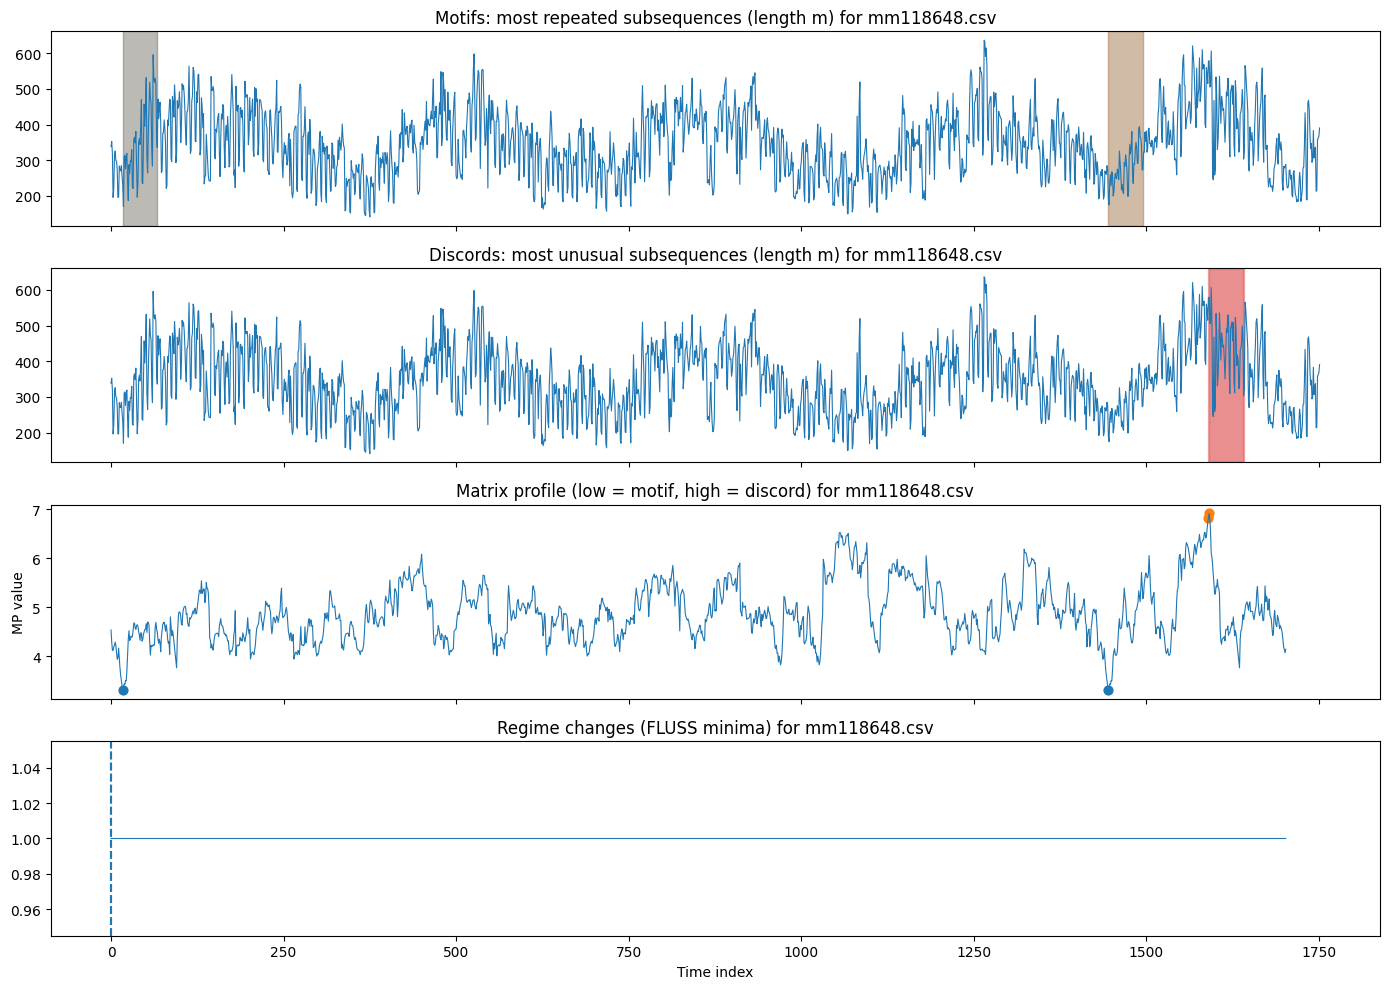

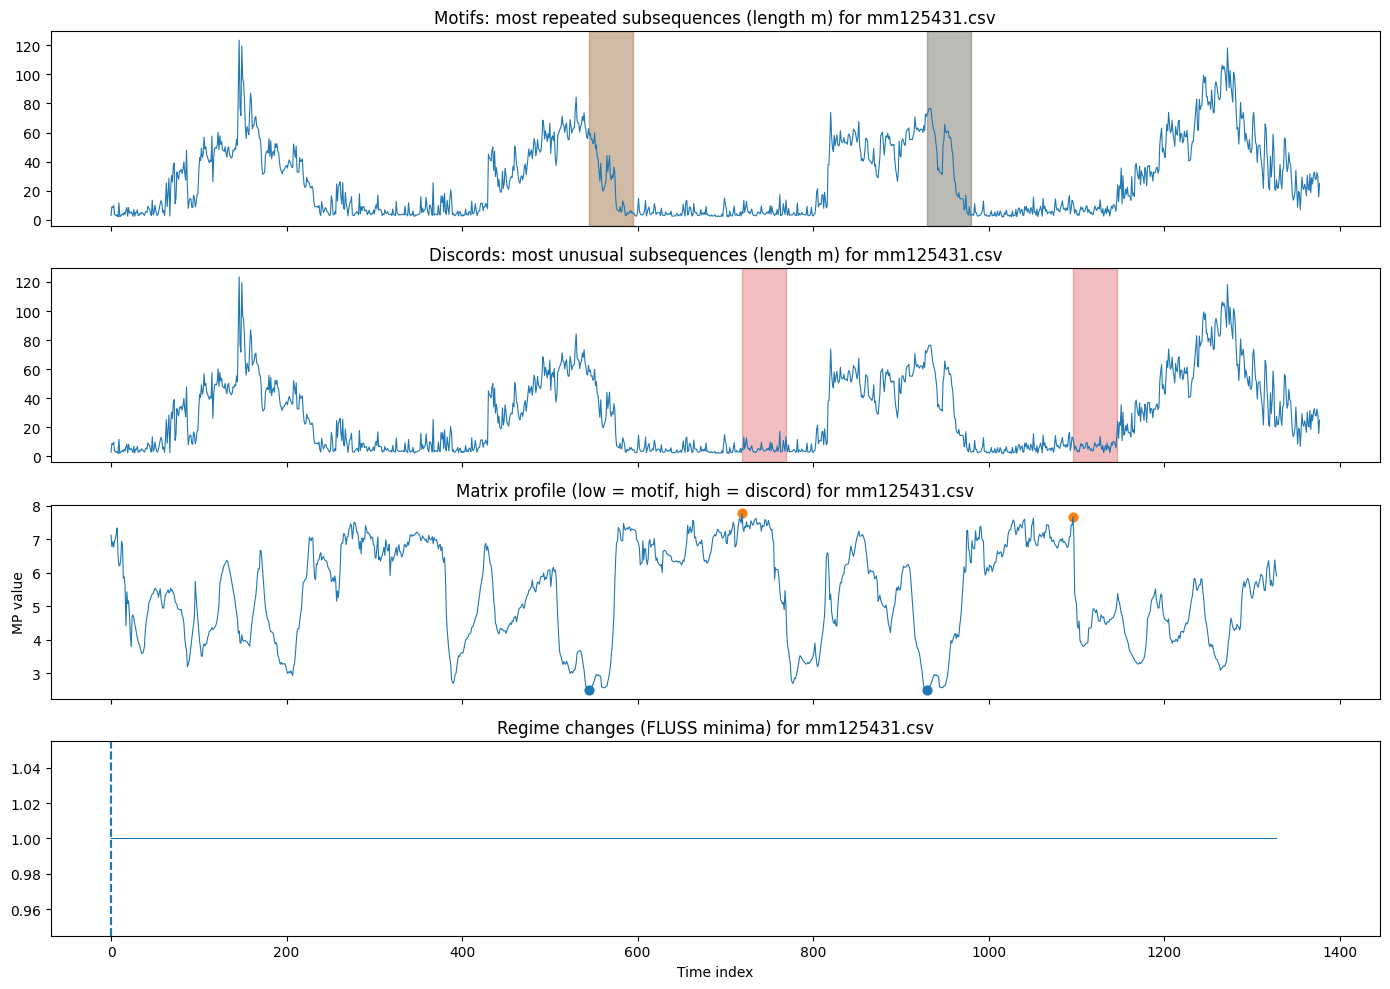

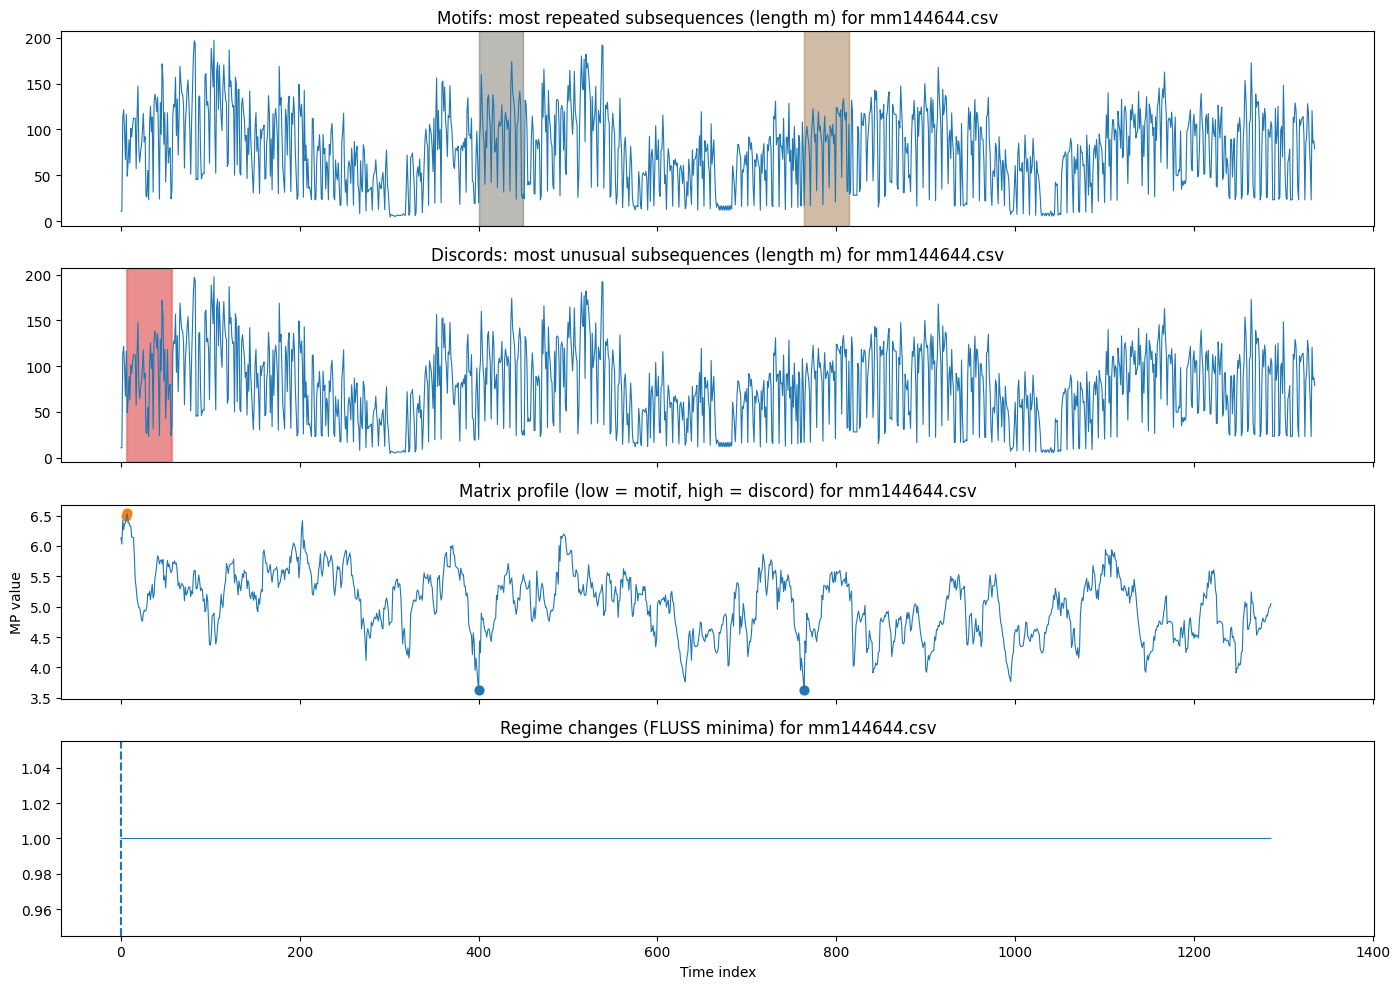

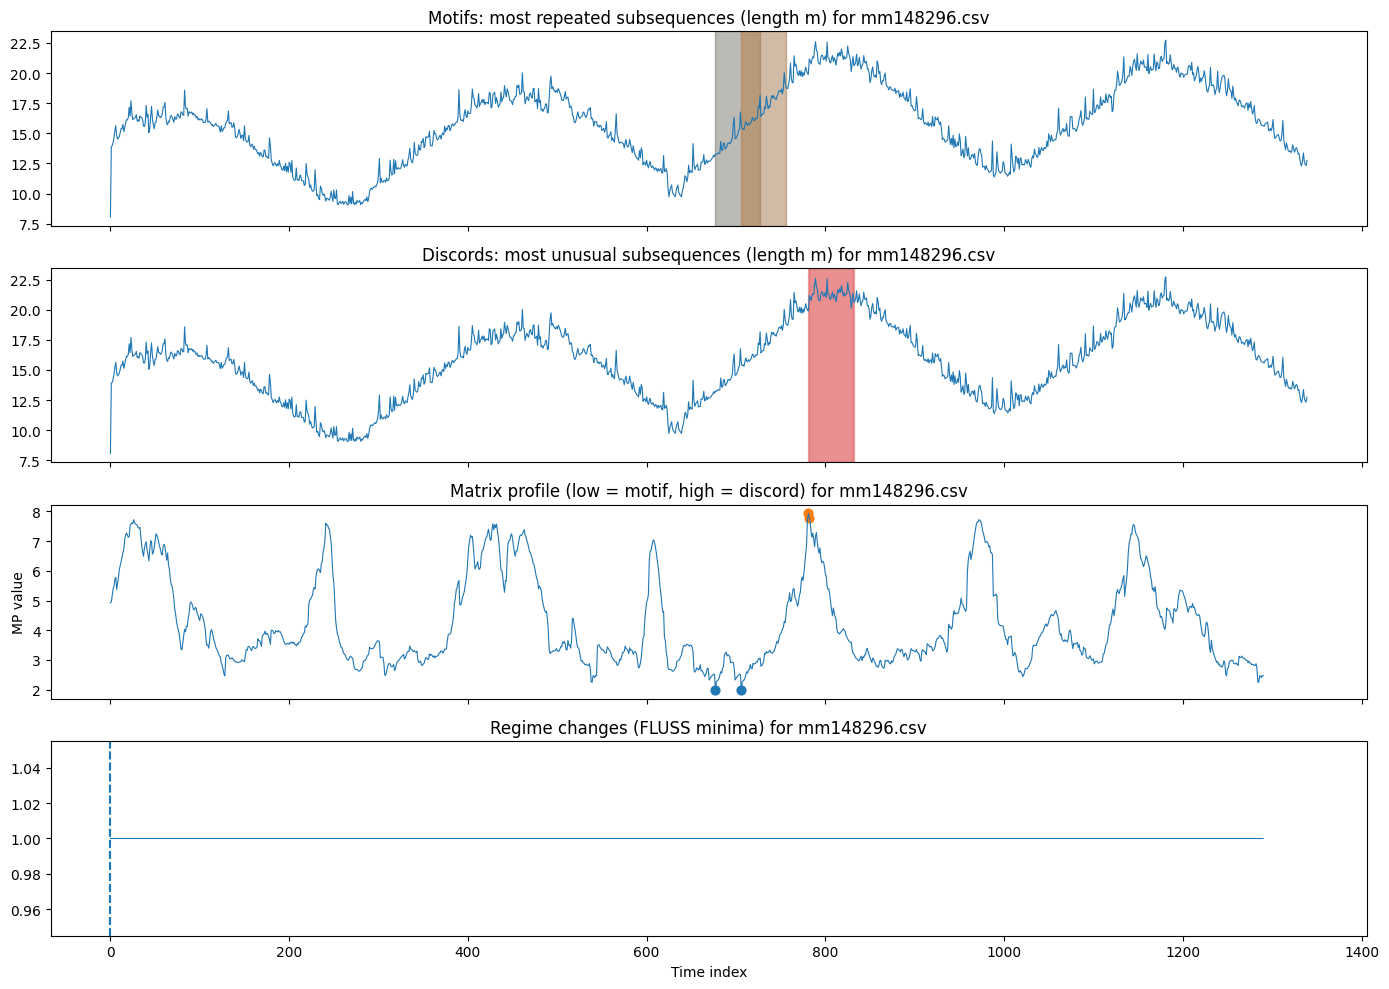

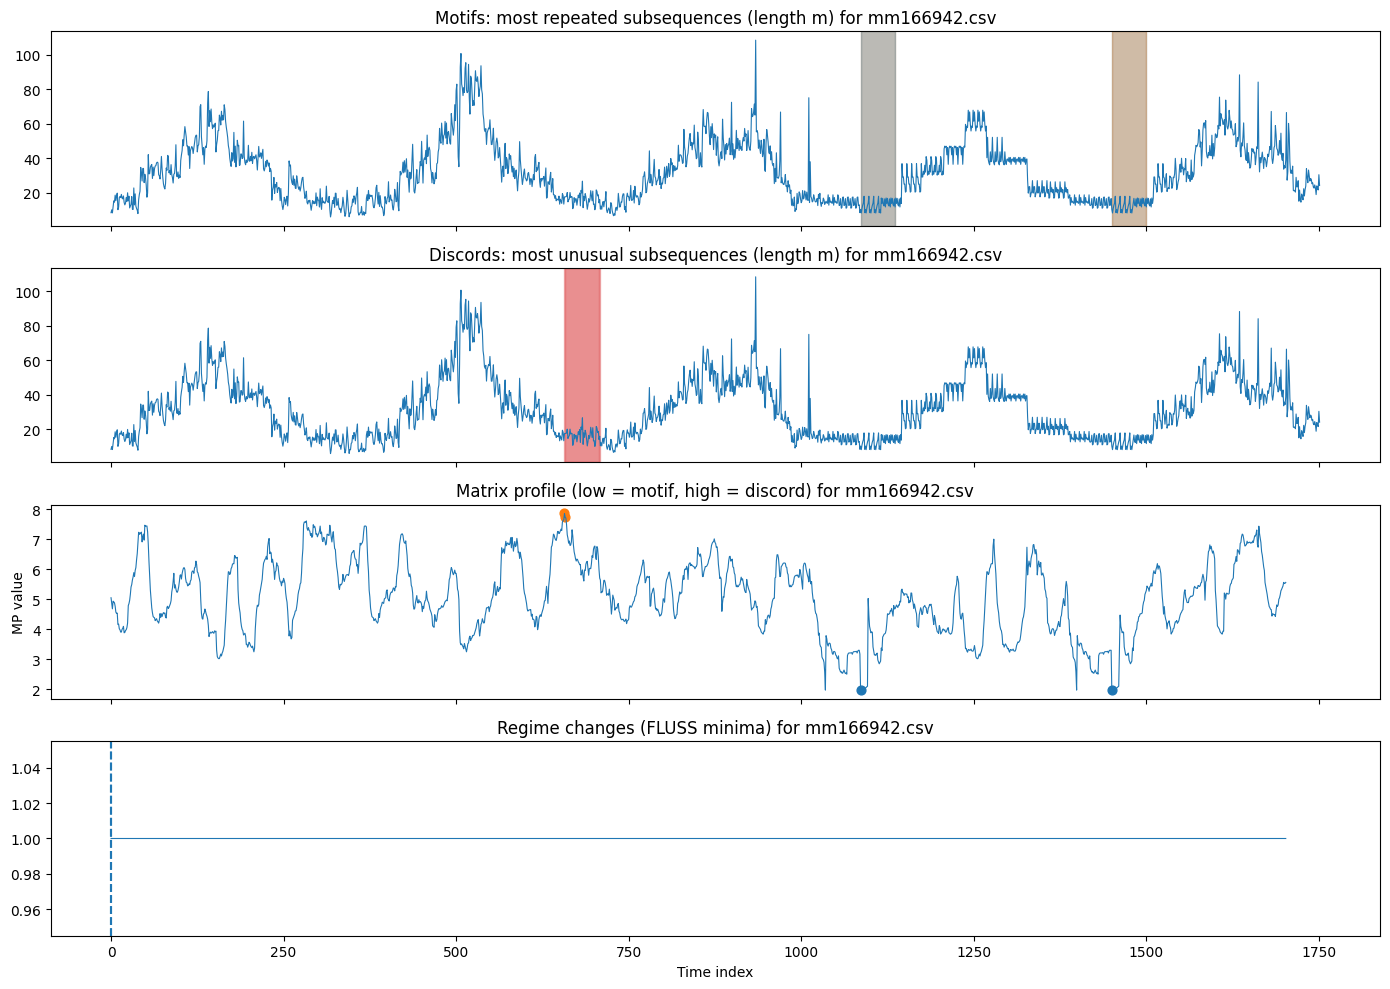

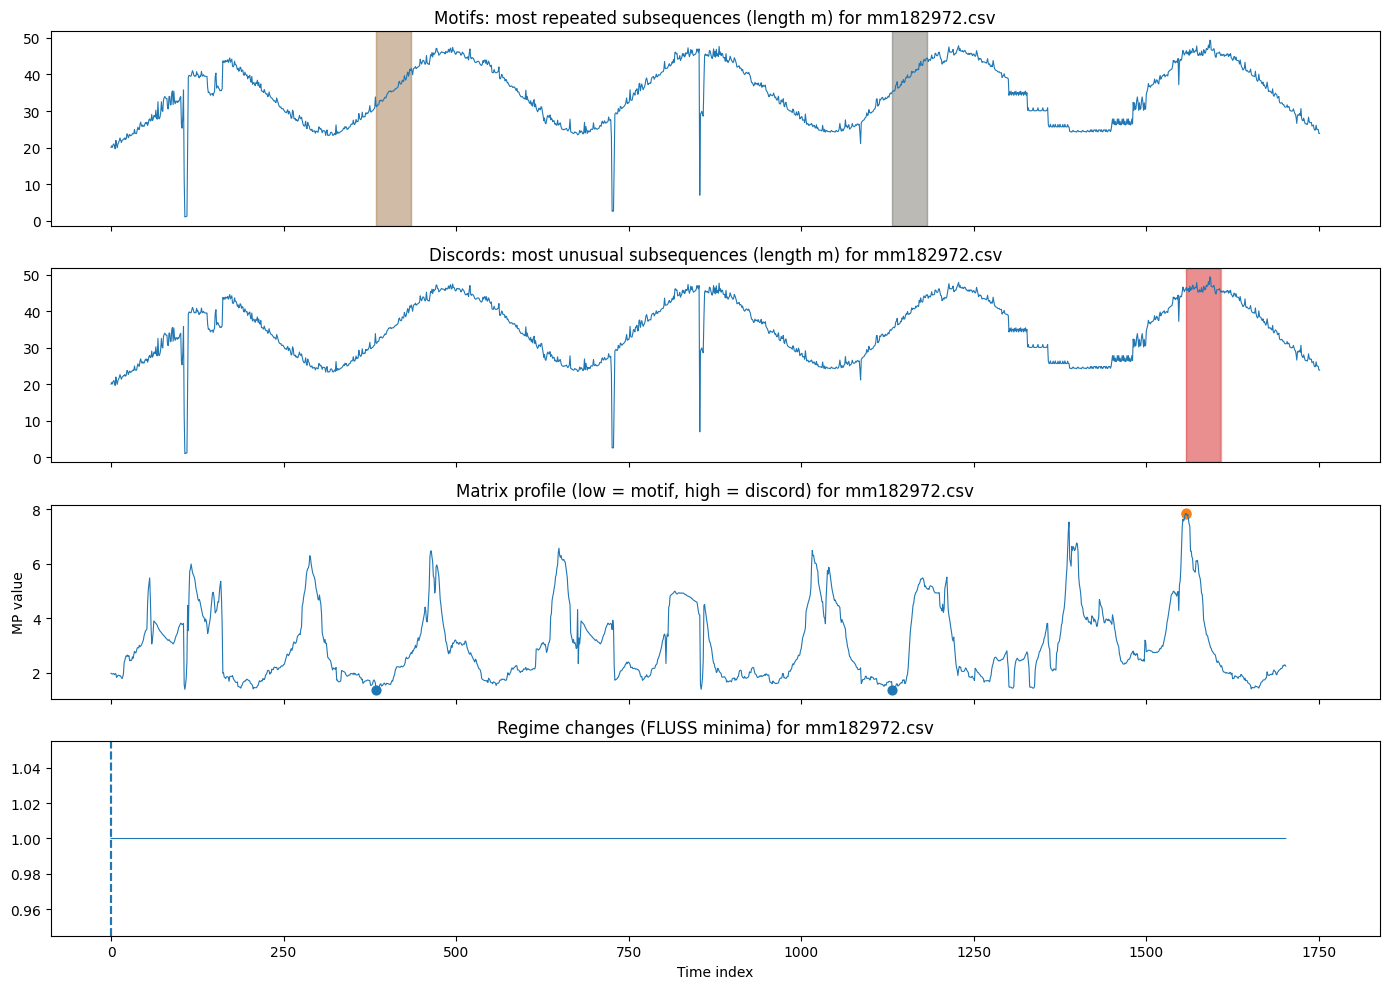

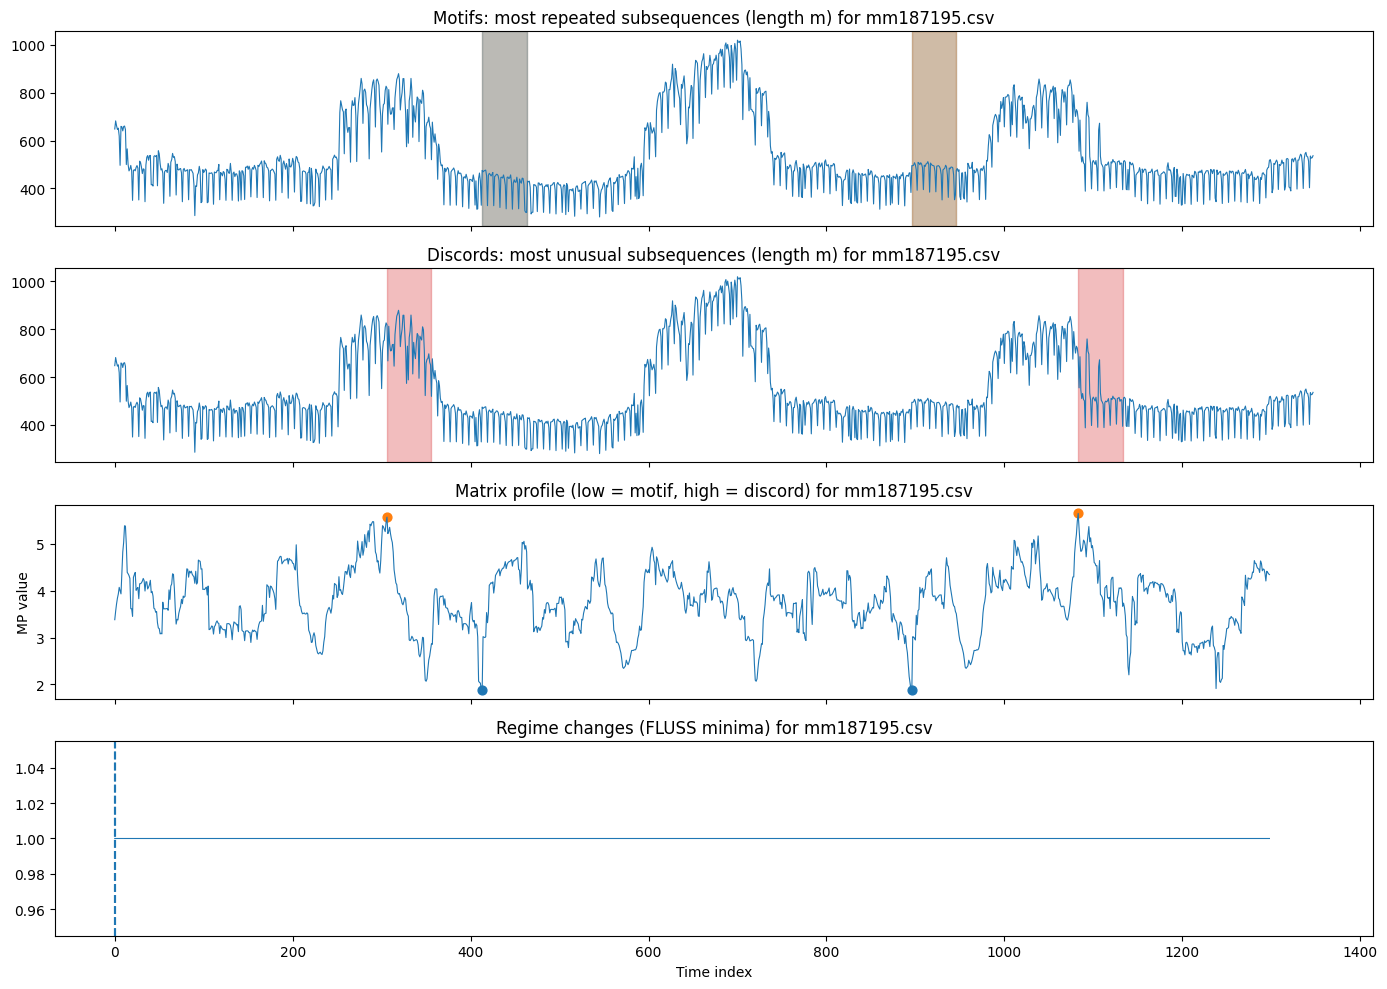

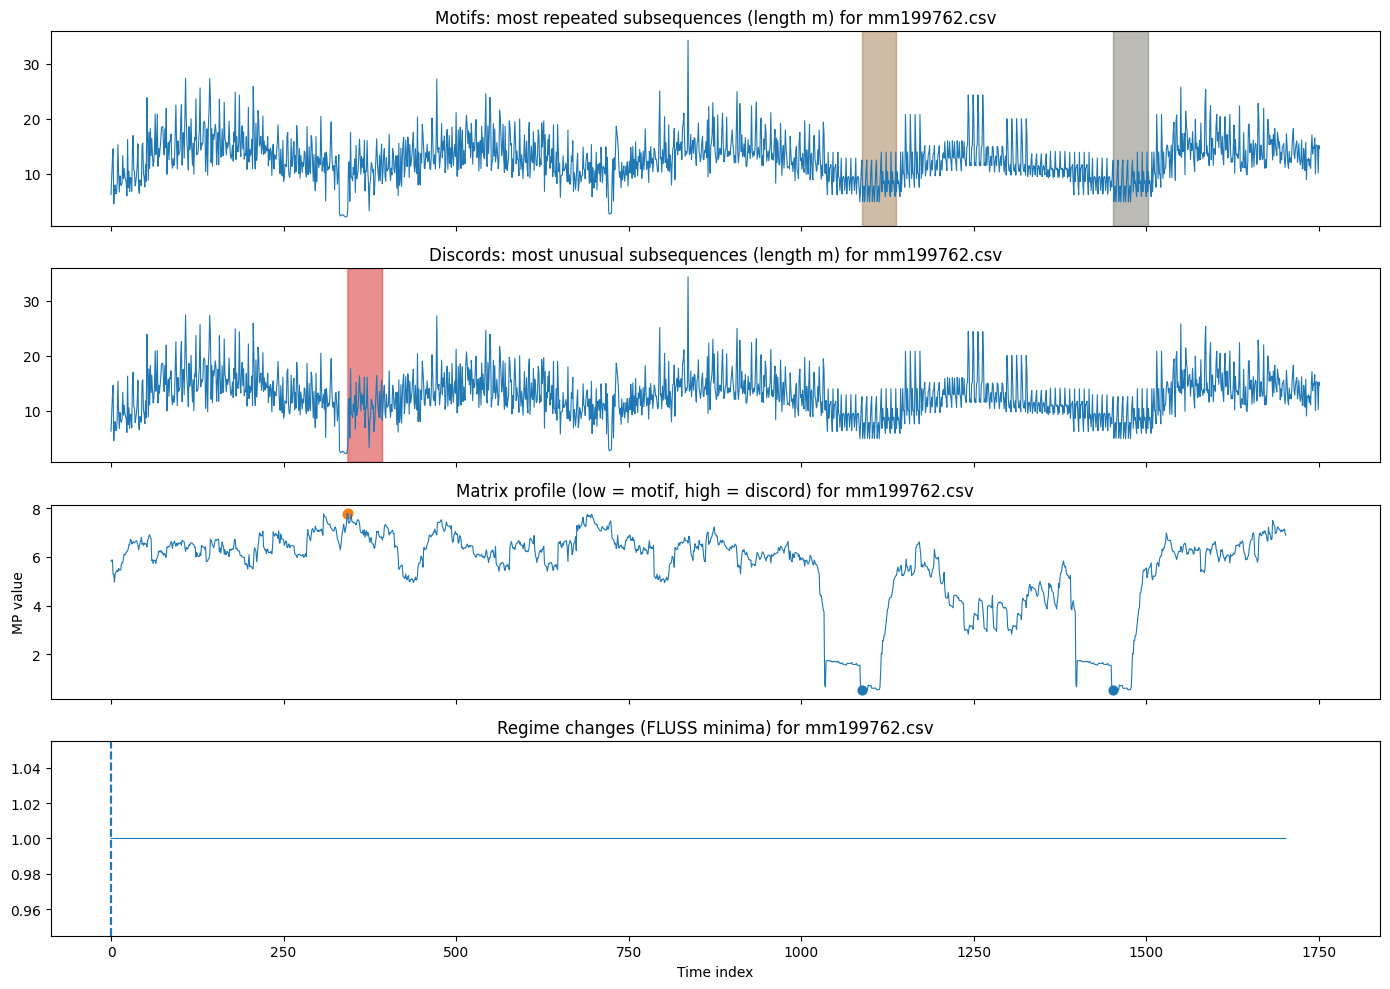

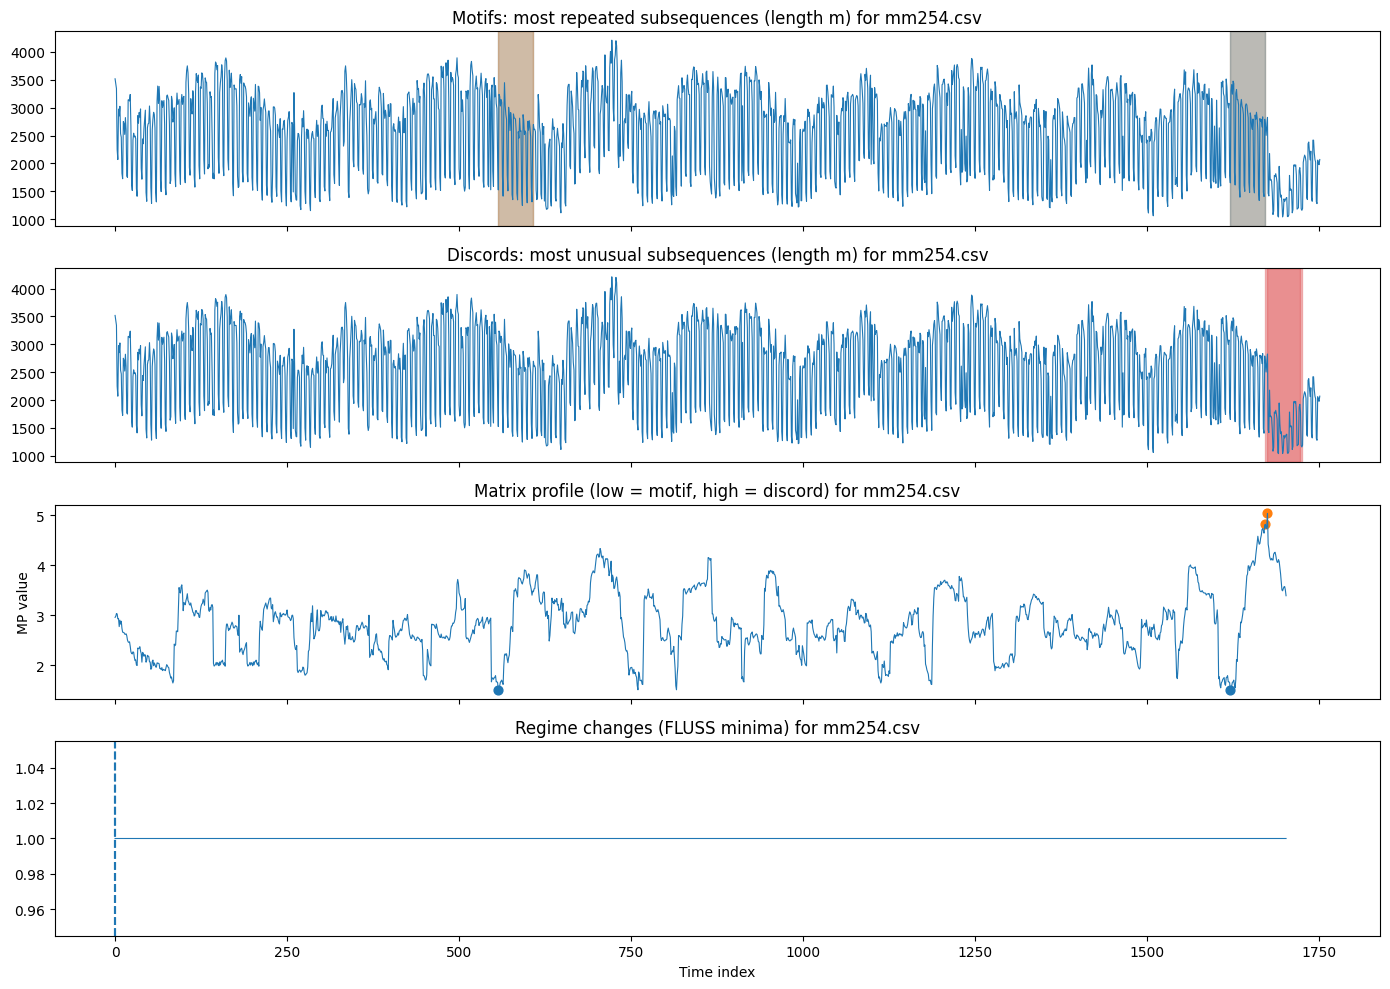

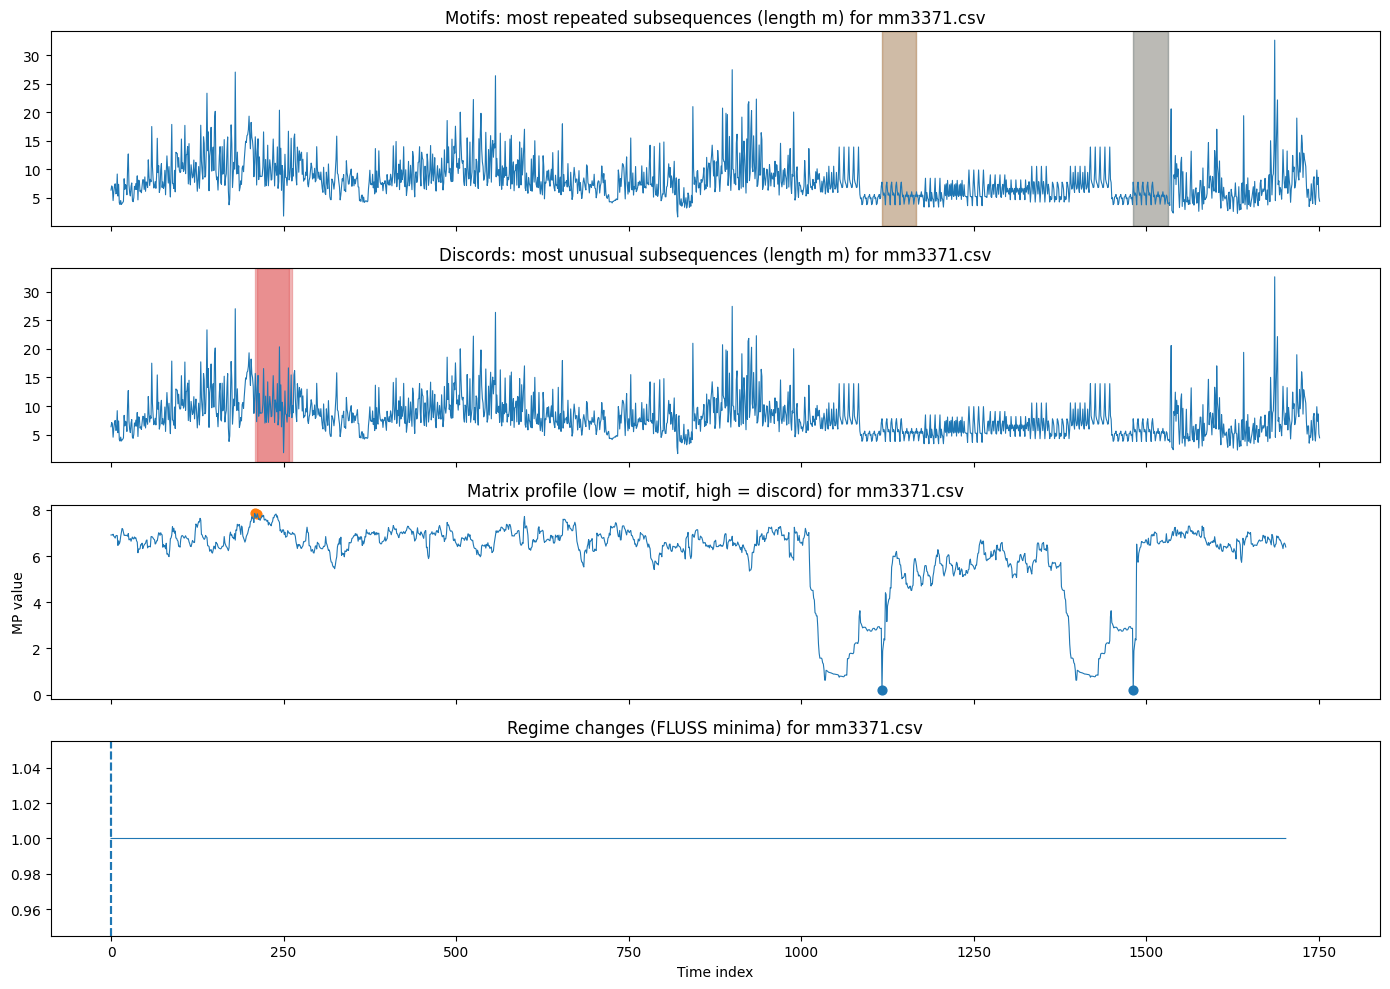

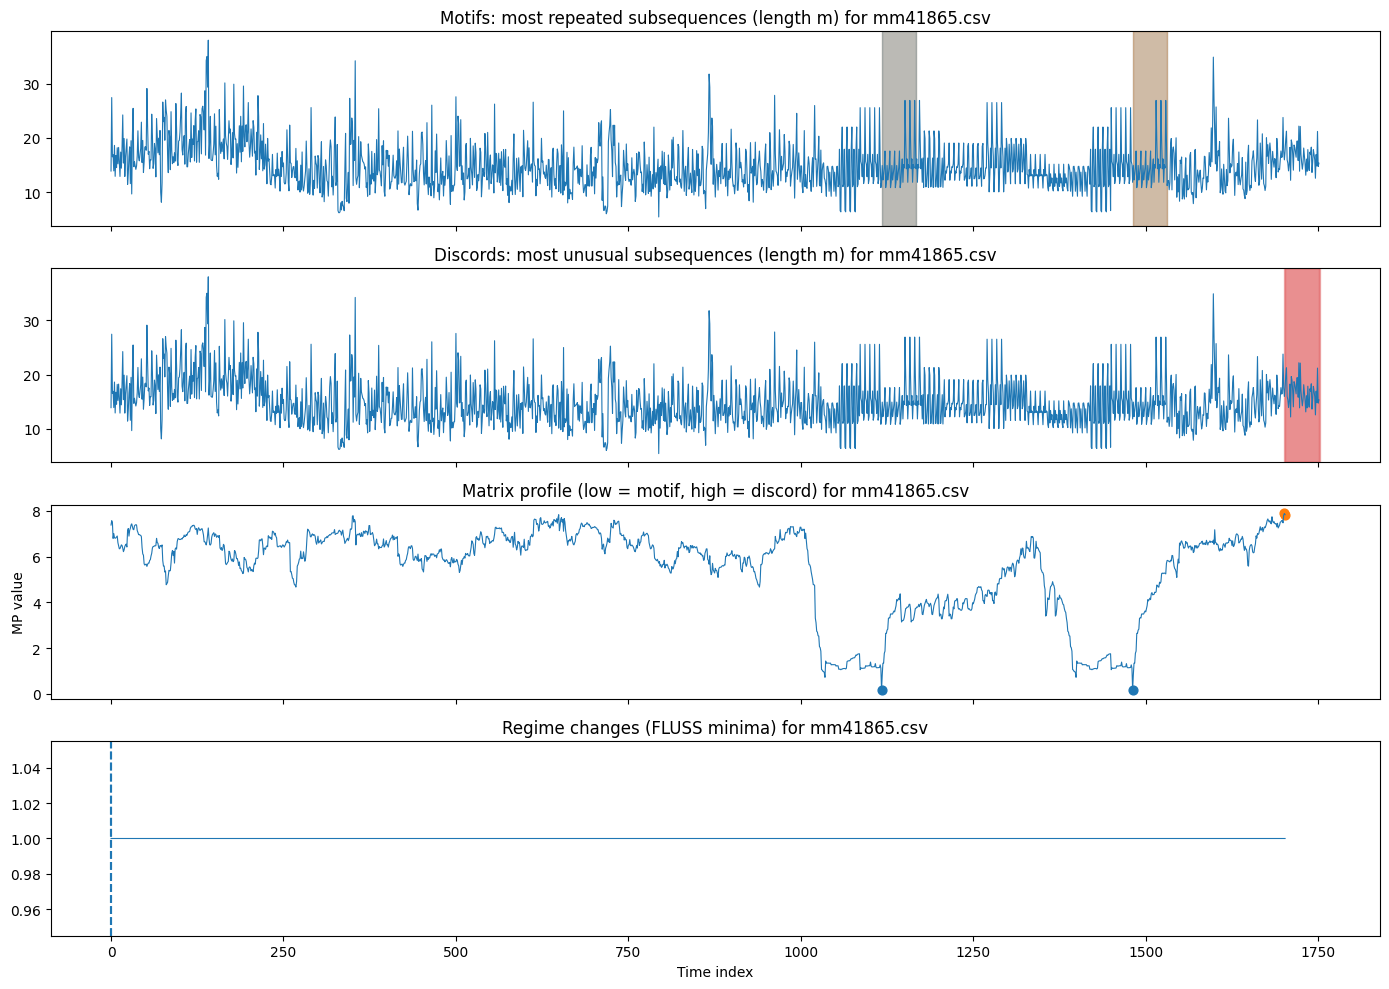

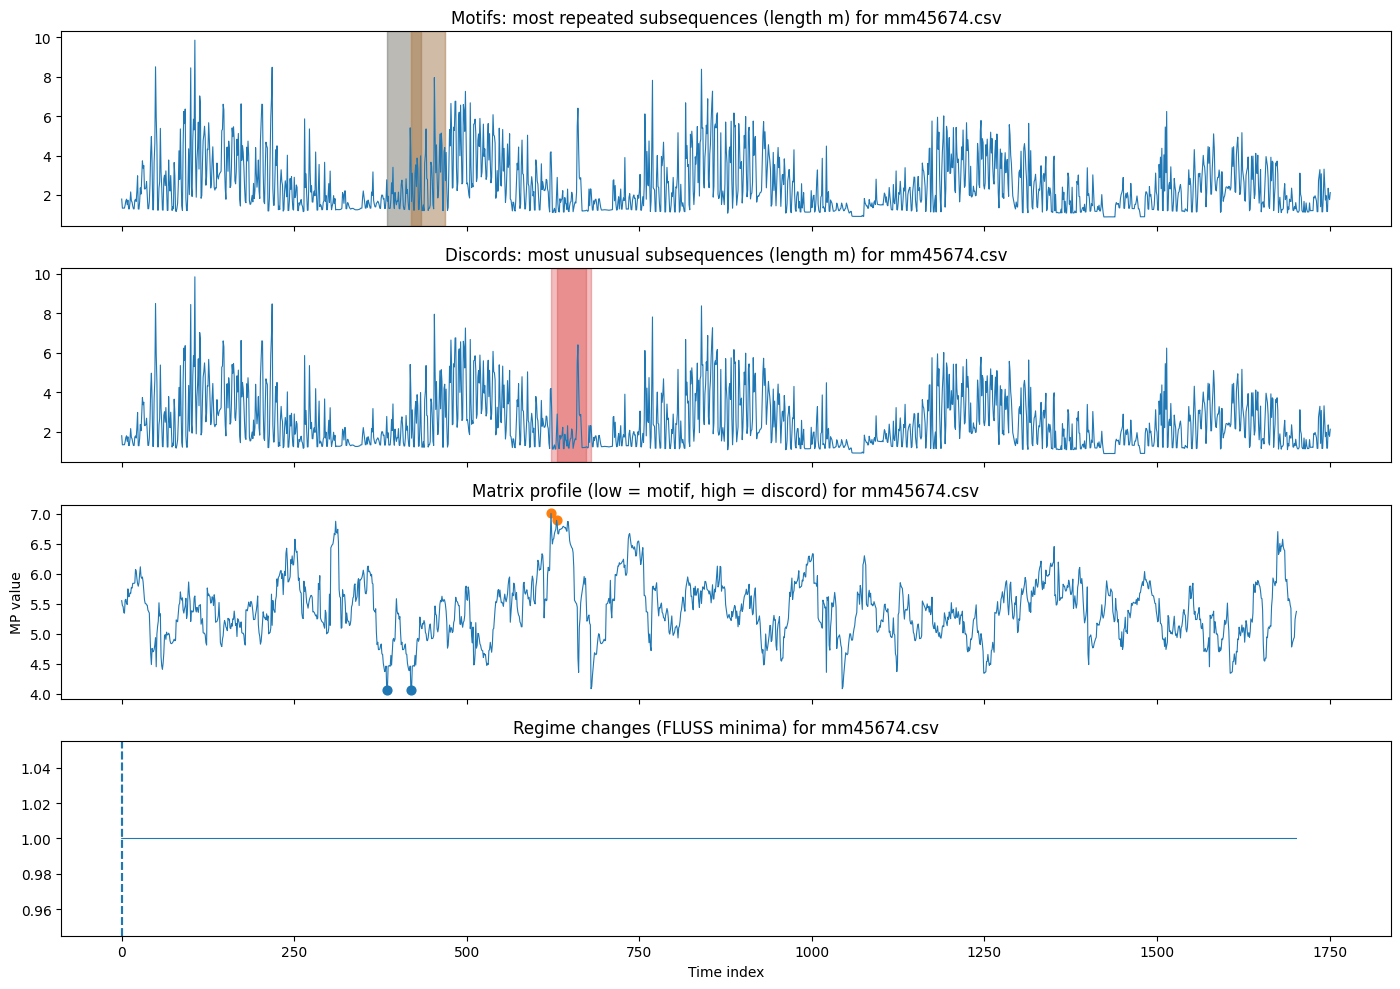

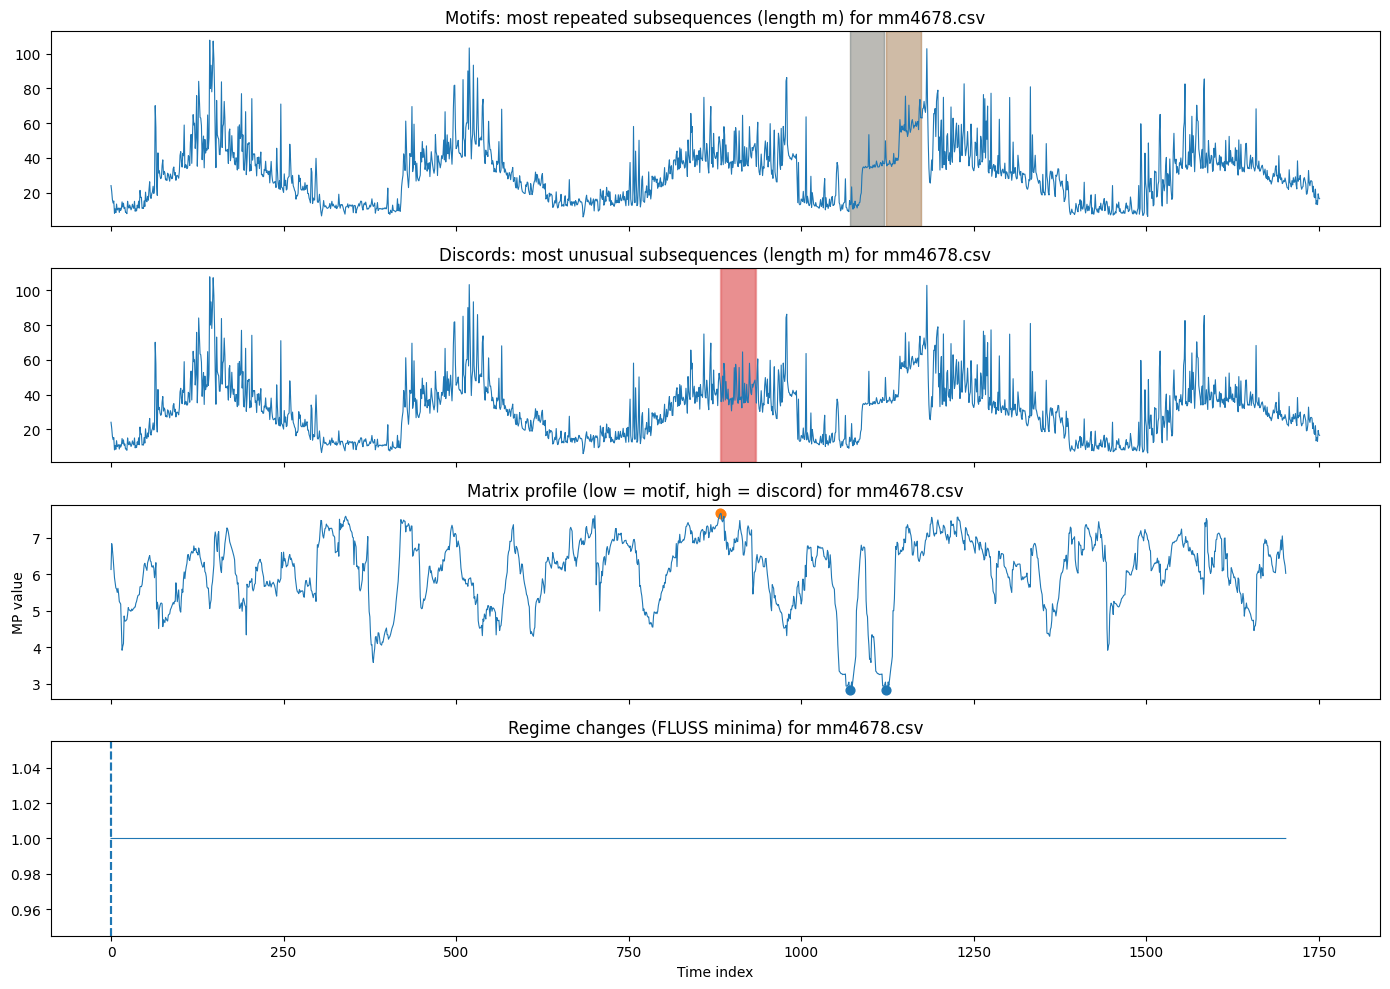

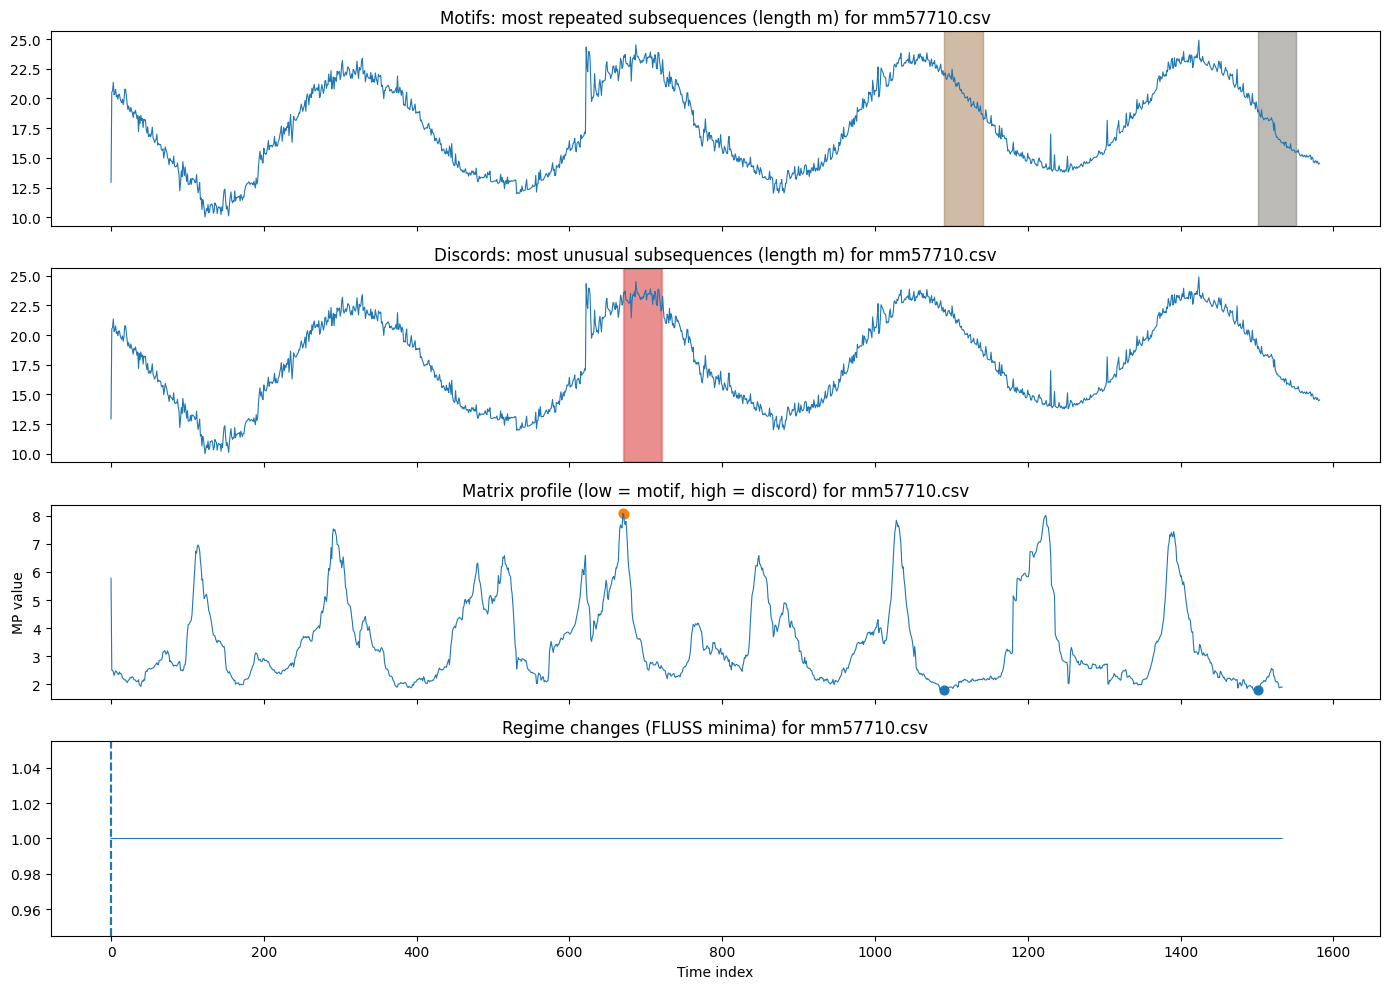

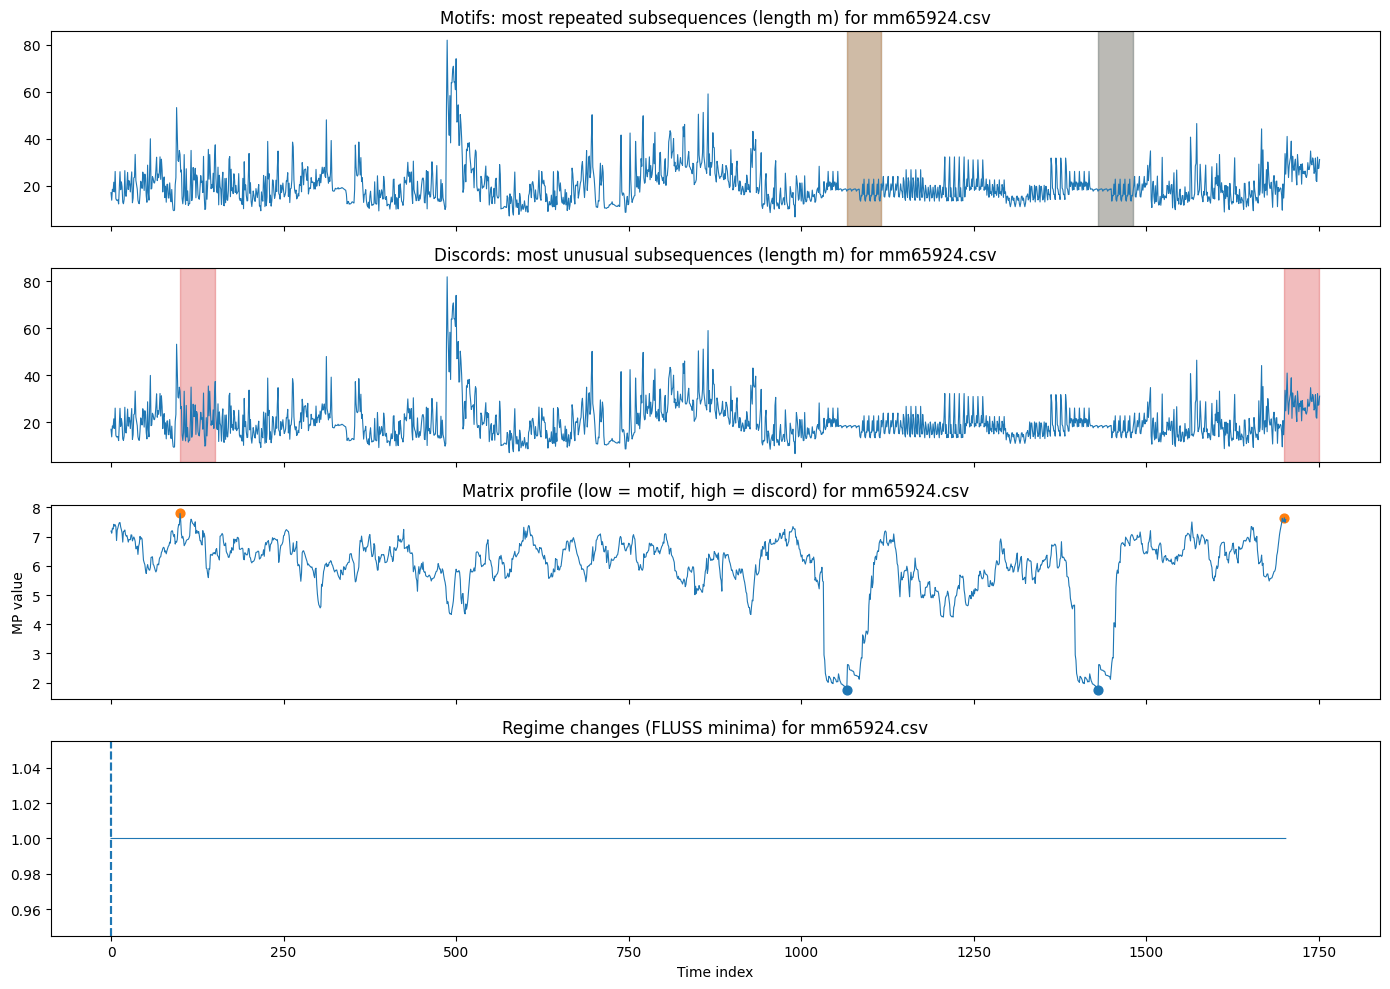

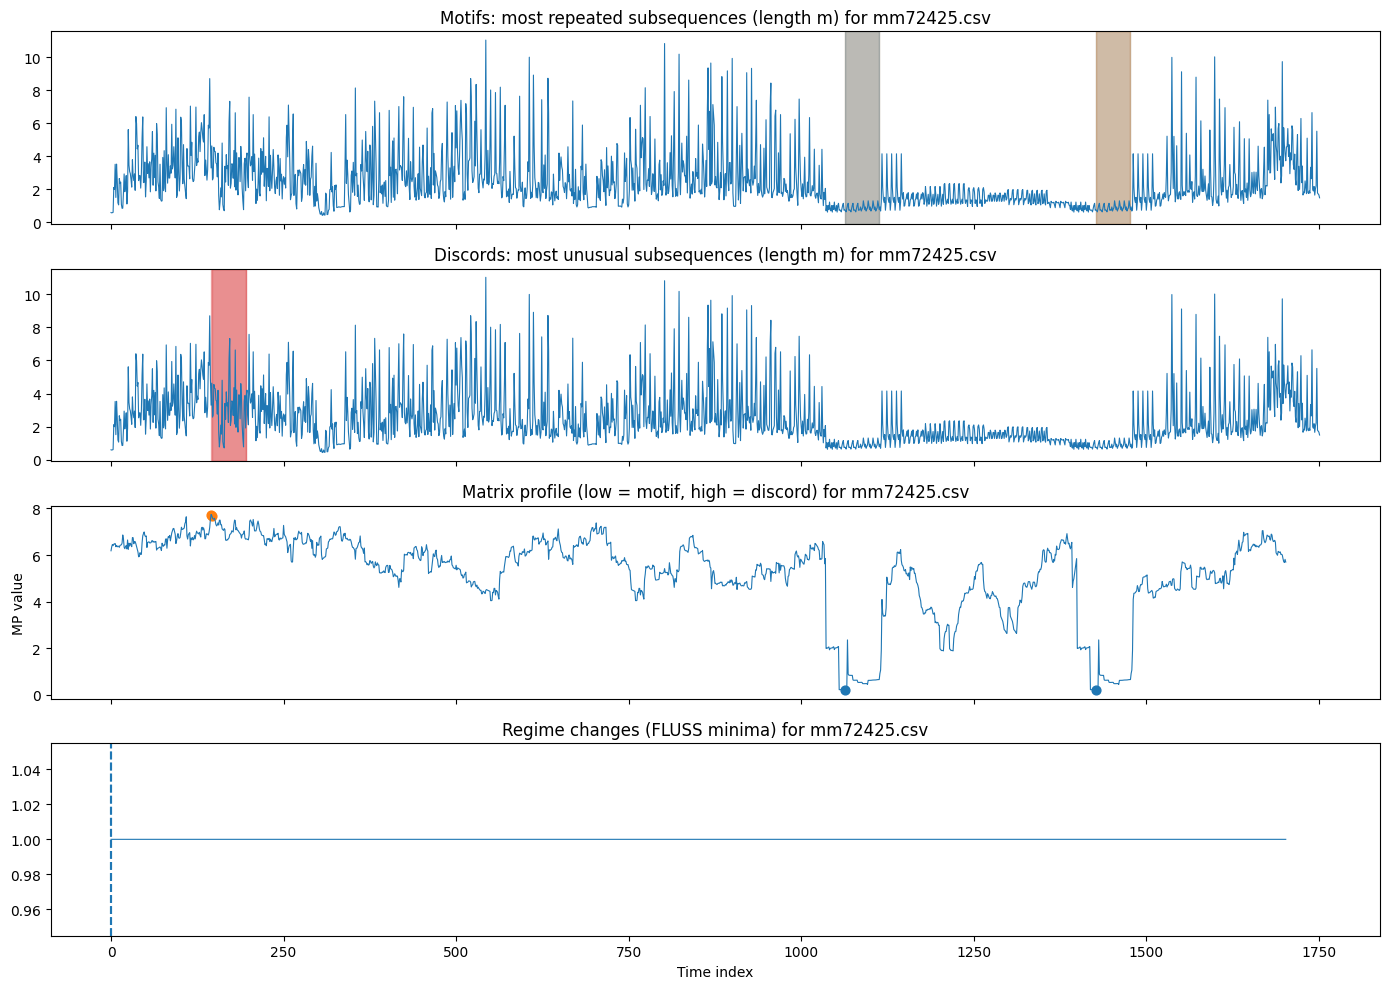

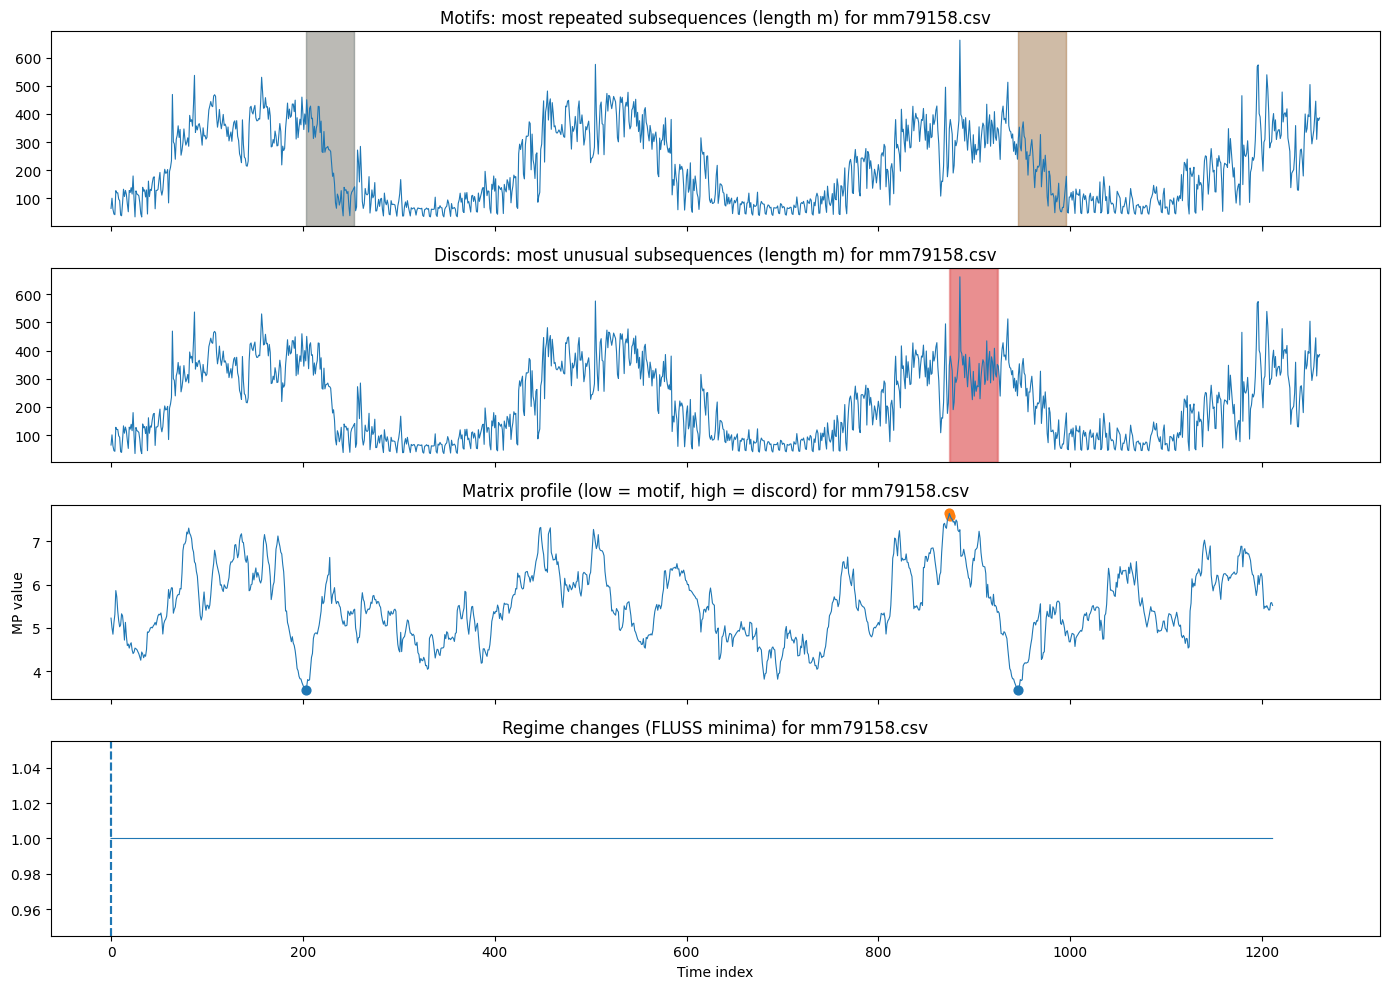

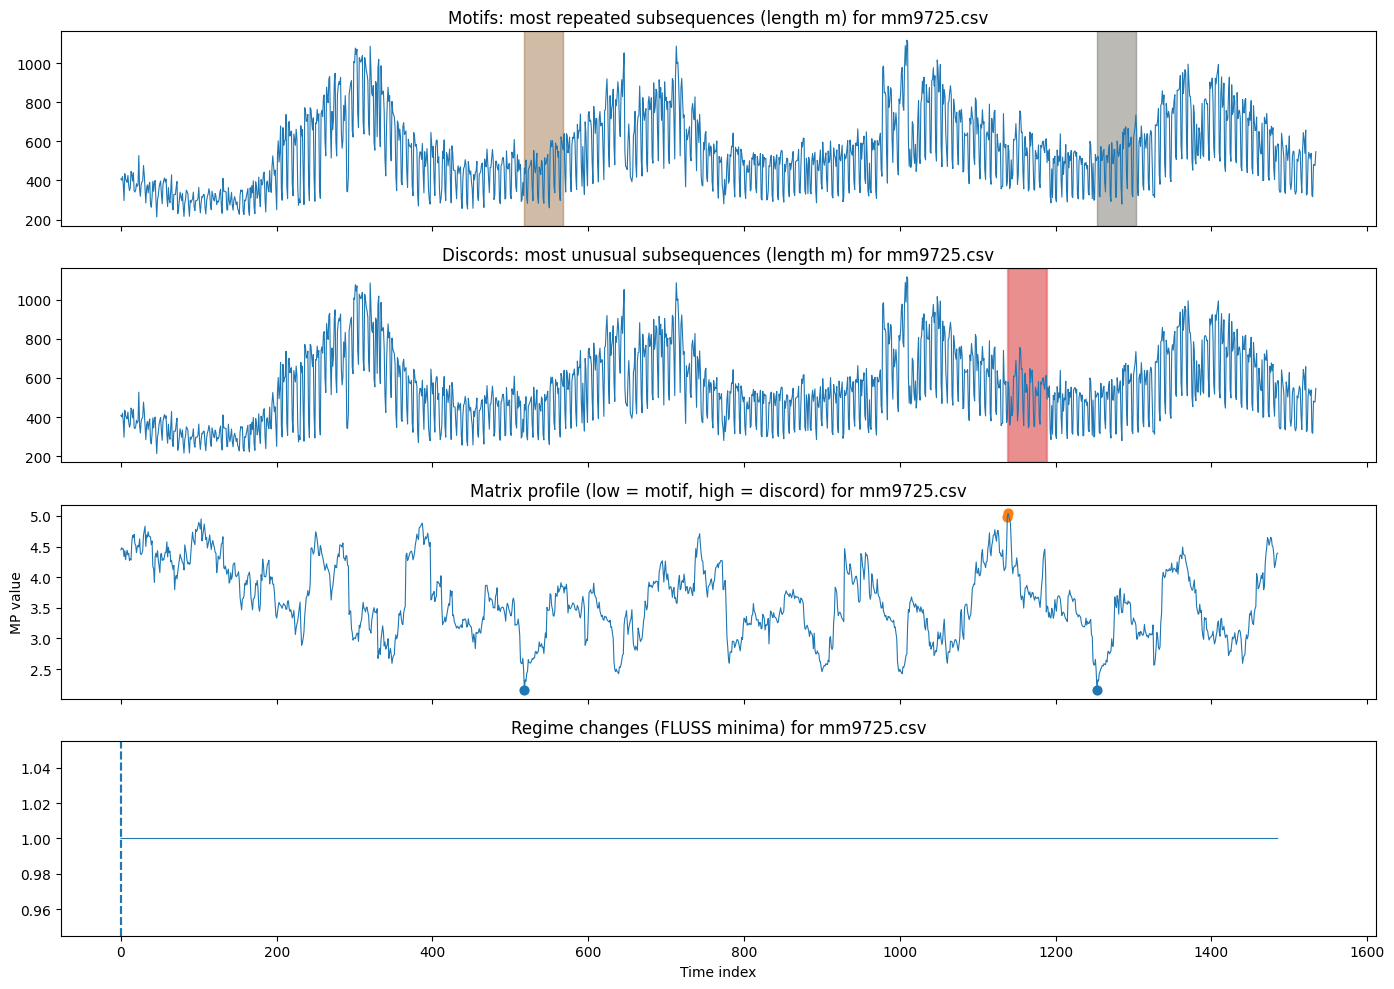

In [26]:
# ---------- 1. Load data and compute matrix profile ----------

for file in os.listdir('data'):
    if str.split(file, '.')[-1] == "csv":
        df = pd.read_csv(f"data/{file}")
        ts = df["load"].values.astype(float)
        plot_profile(ts, file)
